1. Rank of the country from region level
    1. Which country ranked highest in that region
2. Pillar Score of the country in Government Framework 
    1. Did the Country score Zero
    2. Is there a country in the same region that score much higher



- The title
- the subtitle
- the radar chart
- the triangle chart
- box and whisker
- supporting text for each chart
- AI chat

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_excel('../../data/GIRAI.xlsx', sheet_name='Scores')
tf = pd.read_excel('../../data/GIRAI.xlsx', sheet_name='thematic')

cf = pd.merge(df, tf, on='country')

In [3]:
# Adjust the thematic area to filter
# Safety_accuracy_reliability = ['Safety, Accuracy and Reliability']

# Filter the dataset again
# sarData = tf[tf.thematic_area.isin(Safety_accuracy_reliability)]

In [48]:
df['ranking_category'] = pd.qcut(df['Index'], q=4, labels=['Low Adoption', 'Emerging Adoption', 'Strong Adoption', 'Leading Adoption'])

In [5]:
# sarDatathanZero = sarData[sarData['ta_score'] > 0]
# tfDatathanZero = tf[tf['ta_score'] > 0]
# sarDatathanZero = sarDatathanZero.sort_values(by='ta_score', ascending=False)

In [8]:
def country_by_indicator_and_thematic_area(df, thematic_area, indicator_existence, region_cat, region):
    """
    Filters a DataFrame by thematic area and ta_score, groups the data by girai_subregion,
    and returns a combined DataFrame of grouped counts.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        thematic_area (str): The thematic area to filter.
    
    Returns:
        pd.DataFrame: A DataFrame with grouped counts and a percentage column.
    """
    # Step 1: Filter by thematic area and region
    thematic_filtered = df[(df['thematic_area'] == thematic_area) & (df[region_cat] == region) ]
    
    # Step 2: Filter by ta_score > 0
    indicator_filtered = thematic_filtered[thematic_filtered[indicator_existence] == "Yes"]
    
   # step 3: Return all the countries in the region
    return indicator_filtered[["ranking", "country"]]

In [9]:
country_by_indicator_and_thematic_area(cf, "International Cooperation", "ga_existence_text", "region_x", "Africa")

,ranking,country
788,42.0,South Africa
959,51.0,Morocco
997,53.0,Benin
1054,56.0,Senegal
1111,59.0,Rwanda
1168,62.0,Tunisia
1187,63.0,Egypt
1377,73.0,Namibia
1453,77.0,Kenya
1510,80.0,Nigeria


In [10]:
def regions_count_by_indicator_and_thematic_area(df, thematic_area, indicator_existence, region, indicator_score):
    """
    Filters a DataFrame by thematic area and ta_score, groups the data by girai_subregion,
    and returns a combined DataFrame of grouped counts.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        thematic_area (str): The thematic area to filter.
    
    Returns:
        pd.DataFrame: A DataFrame with grouped counts and a percentage column.
    """
    # Step 1: Filter by thematic area
    thematic_filtered = df[df['thematic_area'] == thematic_area]
    
    # Step 2: Filter by ta_score > 0
    indicator_filtered = thematic_filtered[thematic_filtered[indicator_existence] == "Yes"]
    
    # Step 3: Group by girai_subregion and count occurrences
    group_original = thematic_filtered.groupby(region).size().reset_index(name='Total Countries in this region')
    group_filtered = indicator_filtered.groupby(region).size().reset_index(name='Number of Countries with existing Indicator')
    group_average = indicator_filtered.groupby(region)[indicator_score].mean().reset_index(name='Average Indicator Score')
    
    # Step 4: Combine the results
    combined = pd.merge(group_original, group_filtered, on=region, how='outer').fillna(0)
    combined = pd.merge(combined, group_average, on=region, how='outer').fillna(0)

    # Step 5: Add the percentage column
    combined['Percentage'] = ((combined['Number of Countries with existing Indicator'] / combined['Total Countries in this region']) * 100).round(2)
    
    return combined.sort_values(by='Average Indicator Score', ascending=False)


In [11]:
regions_count_by_indicator_and_thematic_area(tf, "Cultural and Linguistic Diversity", 'fr_doc1_existence_text', 'region', "fr_weighted_score")

,region,Total Countries in this region,Number of Countries with existing Indicator,Average Indicator Score,Percentage
3,Europe,30,12,31.809159,40.00
2,Asia,37,9,22.692610,24.32
1,Americas,26,2,21.120283,7.69
0,Africa,41,1,20.047170,2.44
4,Oceania,2,2,19.487028,100.00


In [12]:
def action_type_by_region_and_thematic_area(df, indicator_col, thematic_area, action_type, region):
    """
    Filters the dataframe based on indicator and thematic area, 
    then groups it by the action type and returns the result.
    
    Parameters:
        df (pd.DataFrame): The dataframe to be processed.
        indicator_col (str): The name of the column to check for the indicator.
        thematic_area (str): The value to filter the thematic area column.
        action_type (str): The name of the column to group by.

    Returns:
        pd.Series: Grouped data with counts sorted in descending order.
    """
    # Filter by indicator if 'yes', otherwise leave unfiltered
    if df[indicator_col].str.lower().eq("yes").any():
        df = df[df[indicator_col].str.lower() == "yes"]
    
    # Filter by thematic_area
    df = df[df["thematic_area"] == thematic_area]
    
    # Group by action_type and return sorted counts
    grouped = df.groupby([action_type, region]).size().sort_values(ascending=False)
    return grouped


In [13]:
tf["thematic_area"].unique()

array(['Access to Remedy and Redress', 'Bias and Unfair Discrimination',
       "Children's Rights", 'Competitions Authorities',
       'Cultural and Linguistic Diversity', 'Data Protection and Privacy',
       'Gender Equality', 'Human Oversight and Determination',
       'Impact Assessments', 'International Cooperation',
       'Labour Protection and Right to Work', 'National AI Policy',
       'Proportionality and Do No Harm',
       'Public Participation and Awareness', 'Public Procurement',
       'Public Sector Skills Development',
       'Responsibility and Accountability',
       'Safety, Accuracy and Reliability',
       'Transparency and Explainability'], dtype=object)

In [14]:
action_type_by_region_and_thematic_area(tf, "nsa_cs_existence_text", "Transparency and Explainability", "nsa_cs_action_type_text", "region").to_csv("cs_thematic_transparency_explainability.csv")

In [15]:
def action_type_by_region(df, indicator_col, action_type, ranking_category):
    """
    Filters the dataframe based on indicator and thematic area, 
    then groups it by the action type and returns the result.
    
    Parameters:
        df (pd.DataFrame): The dataframe to be processed.
        indicator_col (str): The name of the column to check for the indicator.
        thematic_area (str): The value to filter the thematic area column.
        action_type (str): The name of the column to group by.

    Returns:
        pd.Series: Grouped data with counts sorted in descending order.
    """
    # Filter by indicator if 'yes', otherwise leave unfiltered
    if df[indicator_col].str.lower().eq("yes").any():
        df = df[df[indicator_col].str.lower() == "yes"]

    # Group by action_type and return sorted counts
    grouped = df.groupby([action_type, ranking_category]).size().sort_values(ascending=False)
    return grouped


In [16]:
action_type_by_region(tf, "nsa_cs_existence_text", "nsa_cs_action_type_text", "ranking_category")


nsa_cs_action_type_text                                       ranking_category 
Research and analysis                                         Leading Adoption     104
Advocacy and public awareness campaigns                       Leading Adoption      99
Research and analysis                                         Strong Adoption       58
Conferences and workshops                                     Leading Adoption      55
Advocacy and public awareness campaigns                       Strong Adoption       48
Conferences and workshops                                     Strong Adoption       42
Developing ethical guidelines, standards, and best practices  Leading Adoption      34
Research and analysis                                         Emerging Adoption     30
Training and courses                                          Leading Adoption      23
Advocacy and public awareness campaigns                       Emerging Adoption     20
Other                                             

In [20]:
# save_total_action_type = action_type_by_region(tf, "nsa_cs_existence_text", "nsa_cs_action_type_text", "ranking_category")
# save_total_action_type.to_csv("save_total_action_type.csv")

In [29]:
def process_thematic_area_by_coutry(df, thematic_area, region):
    """
    Filters a DataFrame by thematic area and ta_score, groups the data by girai_subregion,
    and returns a combined DataFrame of grouped counts.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        thematic_area (str): The thematic area to filter.
    
    Returns:
        pd.DataFrame: A DataFrame with grouped counts and a percentage column.
    """
    # Step 1: Filter by thematic area
    thematic_filtered = df[(df['thematic_area'] == thematic_area) & (df["region_x"] == region)]
    
    # Step 2: Filter by ta_score > 0
    ta_score_filtered = thematic_filtered[thematic_filtered['ta_score'] > 0]
    
    # Step 3: Group by girai_subregion and count occurrences
  
    
    return ta_score_filtered[["country", "ranking", "region_x", "ta_score"]]


In [79]:
tf["thematic_area"].unique()

array(['Access to Remedy and Redress', 'Bias and Unfair Discrimination',
       "Children's Rights", 'Competitions Authorities',
       'Cultural and Linguistic Diversity', 'Data Protection and Privacy',
       'Gender Equality', 'Human Oversight and Determination',
       'Impact Assessments', 'International Cooperation',
       'Labour Protection and Right to Work', 'National AI Policy',
       'Proportionality and Do No Harm',
       'Public Participation and Awareness', 'Public Procurement',
       'Public Sector Skills Development',
       'Responsibility and Accountability',
       'Safety, Accuracy and Reliability',
       'Transparency and Explainability'], dtype=object)

In [170]:
process_thematic_area_by_coutry(cf, "Transparency and Explainability", "Europe")

,country,ranking,region_x,ta_score
18,Netherlands,1.0,Europe,97.311320
37,Germany,2.0,Europe,93.696934
56,Ireland,3.0,Europe,96.108492
75,United Kingdom of Great Britain and Northern I...,4.0,Europe,92.635613
113,Estonia,6.0,Europe,87.815133
132,Italy,7.0,Europe,72.502617
151,France,8.0,Europe,88.685141
246,Slovenia,13.0,Europe,39.929578
265,Portugal,14.0,Europe,23.588170
284,Switzerland,15.0,Europe,51.818654


In [43]:
def process_thematic_area(df, thematic_area, region):
    """
    Filters a DataFrame by thematic area and ta_score, groups the data by girai_subregion,
    and returns a combined DataFrame of grouped counts.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        thematic_area (str): The thematic area to filter.
    
    Returns:
        pd.DataFrame: A DataFrame with grouped counts and a percentage column.
    """
    # Step 1: Filter by thematic area
    thematic_filtered = df[df['thematic_area'] == thematic_area]
    
    # Step 2: Filter by ta_score > 0
    ta_score_filtered = thematic_filtered[thematic_filtered['ta_score'] > 0]
    
    # Step 3: Group by girai_subregion and count occurrences
    group_original = thematic_filtered.groupby(region).size().reset_index(name='Total Countries in Subregion')
    group_filtered = ta_score_filtered.groupby(region).size().reset_index(name='Number of Countries with TA Score > 0')
    
    # Step 4: Combine the results
    combined = pd.merge(group_original, group_filtered, on=region, how='outer').fillna(0)

    # Step 5: Add the percentage column
    combined['Percentage'] = ((combined['Number of Countries with TA Score > 0'] / combined['Total Countries in Subregion']) * 100).round(2)
    
    return combined


In [61]:
tf["thematic_area"].unique()

array(['Access to Remedy and Redress', 'Bias and Unfair Discrimination',
       "Children's Rights", 'Competitions Authorities',
       'Cultural and Linguistic Diversity', 'Data Protection and Privacy',
       'Gender Equality', 'Human Oversight and Determination',
       'Impact Assessments', 'International Cooperation',
       'Labour Protection and Right to Work', 'National AI Policy',
       'Proportionality and Do No Harm',
       'Public Participation and Awareness', 'Public Procurement',
       'Public Sector Skills Development',
       'Responsibility and Accountability',
       'Safety, Accuracy and Reliability',
       'Transparency and Explainability'], dtype=object)

In [191]:
process_thematic_area(tf, "Access to Remedy and Redress", "region")

,region,Total Countries in Subregion,Number of Countries with TA Score > 0,Percentage
0,Africa,41,6,14.63
1,Americas,26,8,30.77
2,Asia,38,16,42.11
3,Europe,31,27,87.10
4,Oceania,2,1,50.00


In [5]:
transposed_df = df.set_index('Country').T
transposed_df.to_excel("transformed_data.xlsx")

In [3]:
df.describe()

,Ranking,Index,P_GF,P_GA,P_NSA,D_HR,D_AIG,D_AIC,C_GF,C_GA,C_NSA
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,69.500000,19.777029,18.026749,21.873657,19.085586,18.855267,19.669915,22.250736,0.612996,0.609982,0.706239
std,39.981246,20.417859,21.974370,23.096879,21.223465,20.267213,22.380210,18.328050,0.204290,0.203364,0.225089
min,1.000000,0.470000,0.000000,1.184211,0.000000,0.000000,0.000000,3.000000,0.258844,0.250000,0.250000
25%,35.250000,2.670000,0.000000,3.955514,2.079850,2.037673,1.704829,7.363812,0.467129,0.449440,0.509766
50%,69.500000,12.130000,7.856463,12.001769,12.088388,12.296464,10.272742,15.147788,0.604658,0.598467,0.726562
75%,103.750000,32.877500,29.906152,33.617257,28.268882,29.662097,34.466857,34.027097,0.767394,0.758107,0.921875
max,138.000000,86.160000,81.707218,95.461457,91.228421,84.105088,91.119335,88.587970,0.996462,0.994693,1.000000


In [4]:
numerical_data = df[["Index", "P_GF", "P_GA", "P_NSA", "D_HR", "D_AIG", "D_AIC", "C_GF", "C_GA", "C_NSA"]]
numerical_data.head()

,Index,P_GF,P_GA,P_NSA,D_HR,D_AIG,D_AIC,C_GF,C_GA,C_NSA
0,86.16,74.325554,95.461457,91.228421,78.744480,91.119335,88.587970,0.962854,0.969929,1.000000
1,82.77,72.687023,92.996525,82.484523,80.301813,90.936326,64.032176,0.941627,0.939858,0.921875
2,74.98,81.707218,74.174529,63.158947,84.105088,73.684709,57.602424,0.950472,0.952241,1.000000
3,73.12,60.663893,80.898400,82.484038,67.588612,79.617905,66.543780,0.934552,0.920401,0.921875
4,72.81,62.406384,79.186321,80.867360,65.372649,74.752738,84.339115,0.923939,0.885024,0.921875


In [5]:
corr_matrix = numerical_data.corr()
corr_matrix

,Index,P_GF,P_GA,P_NSA,D_HR,D_AIG,D_AIC,C_GF,C_GA,C_NSA
Index,1.000000,0.910956,0.939543,0.878868,0.974566,0.988250,0.920647,0.770277,0.762600,0.464419
P_GF,0.910956,1.000000,0.738570,0.703565,0.874242,0.902518,0.865285,0.744249,0.729065,0.428697
P_GA,0.939543,0.738570,1.000000,0.813482,0.921238,0.925650,0.861071,0.716335,0.723291,0.373576
P_NSA,0.878868,0.703565,0.813482,1.000000,0.872399,0.870063,0.762518,0.604885,0.584267,0.533079
D_HR,0.974566,0.874242,0.921238,0.872399,1.000000,0.936909,0.863656,0.745187,0.735870,0.476221
D_AIG,0.988250,0.902518,0.925650,0.870063,0.936909,1.000000,0.891867,0.760328,0.752398,0.459565
D_AIC,0.920647,0.865285,0.861071,0.762518,0.863656,0.891867,1.000000,0.726626,0.725565,0.364380
C_GF,0.770277,0.744249,0.716335,0.604885,0.745187,0.760328,0.726626,1.000000,0.968472,0.605320
C_GA,0.762600,0.729065,0.723291,0.584267,0.735870,0.752398,0.725565,0.968472,1.000000,0.553889
C_NSA,0.464419,0.428697,0.373576,0.533079,0.476221,0.459565,0.364380,0.605320,0.553889,1.000000


### Variations -  Standard Deviation of Metrics

In [6]:
numerical_data.std()

Index    20.417859
P_GF     21.974370
P_GA     23.096879
P_NSA    21.223465
D_HR     20.267213
D_AIG    22.380210
D_AIC    18.328050
C_GF      0.204290
C_GA      0.203364
C_NSA     0.225089
dtype: float64

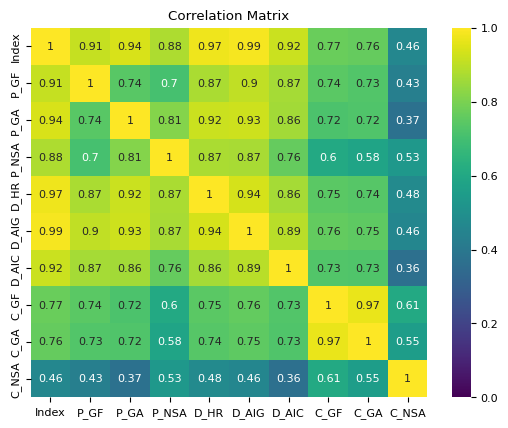

In [16]:
plt.Figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 8})
sns.heatmap(corr_matrix, vmin = 0, vmax = 1, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

### Average Index

In [17]:
df["Index"].mean()

np.float64(19.777028985507247)

### Regional Average

In [8]:
regional_average = df[["UN_subregion", "Index", "P_GF", "P_GA", "P_NSA", "D_HR", "D_AIG", "D_AIC"]].groupby('UN_subregion').mean().round(2).sort_values(by="Index" , ascending=False)
regional_average

,Index,P_GF,P_GA,P_NSA,D_HR,D_AIG,D_AIC
UN_subregion,,,,,,,
Northern America,65.10,50.10,80.01,65.28,60.37,66.91,70.70
Western Europe,58.16,62.08,58.63,49.38,50.13,65.15,55.95
Northern Europe,53.55,55.37,54.48,48.04,52.34,56.24,48.29
Australia and New Zealand,41.78,31.59,53.07,39.55,49.59,42.44,21.54
Southern Europe,32.36,39.62,24.48,33.60,34.62,30.71,32.05
Eastern Asia,30.97,24.58,38.13,29.44,24.20,34.90,35.00
Eastern Europe,29.04,30.30,26.88,30.81,26.37,31.30,28.45
South-eastern Asia,22.57,19.61,27.71,18.22,18.20,23.42,30.22
Western Asia,19.39,18.44,24.56,10.97,19.70,17.69,23.77


### Regions with significant variations

In [21]:
regional_std = df[["UN_subregion", "Index", "P_GF", "P_GA", "P_NSA", "D_HR", "D_AIG", "D_AIC"]].groupby('UN_subregion').std().round(2).sort_values(by="Index" , ascending=False)
regional_std

,Index,P_GF,P_GA,P_NSA,D_HR,D_AIG,D_AIC
UN_subregion,,,,,,,
Western Europe,21.80,8.88,30.35,32.69,23.19,23.61,20.68
Northern Europe,20.90,17.04,29.31,22.19,23.38,21.92,15.42
Australia and New Zealand,20.43,4.39,27.39,38.56,30.72,14.47,14.25
Southern Europe,18.68,27.31,15.87,19.77,20.01,20.45,15.33
South-eastern Asia,17.46,15.16,24.01,19.15,16.99,19.02,19.03
Eastern Asia,16.23,9.44,26.09,19.91,14.86,20.03,11.61
Eastern Europe,14.40,22.37,16.45,21.57,13.81,15.99,18.60
Latin America and the Caribbean,14.10,14.79,17.48,14.86,15.19,15.49,9.68
Southern Asia,13.90,11.40,19.02,10.90,10.87,17.78,11.00


### Top 5 countries based on Index Score

In [22]:
top_5 =  df.nlargest(5, 'Index')
top_5[["Country", "UN_subregion", "Index"]]

,Country,UN_subregion,Index
0,Netherlands,Western Europe,86.16
1,Germany,Western Europe,82.77
2,Ireland,Northern Europe,74.98
3,United Kingdom of Great Britain and Northern I...,Northern Europe,73.12
4,United States of America,Northern America,72.81


### Bottom 5 Lowest Countries 

In [23]:
bottom_5 =  df.nsmallest(5, 'Index')
bottom_5[["Country", "UN_subregion", "Index"]]

,Country,UN_subregion,Index
137,South Sudan,Sub-Saharan Africa,0.47
136,Eritrea,Sub-Saharan Africa,0.56
134,Afghanistan,Southern Asia,0.57
135,Central African Republic,Sub-Saharan Africa,0.57
133,Myanmar,South-eastern Asia,0.60


### Detect Countries with Imbalanced Scores

In [27]:
imbalance_threshold = 20
df['pillar_std_dev'] = df[['P_GF', 'P_GA', 'P_NSA']].std(axis=1)
imbalanced_countries = df[df['pillar_std_dev'] > imbalance_threshold]
imbalanced_countries[['Country','Ranking', 'P_GF', 'P_GA', 'P_NSA', 'pillar_std_dev', "Index"]].sort_values(by="Index", ascending=False)

,Country,Ranking,P_GF,P_GA,P_NSA,pillar_std_dev,Index
8,Canada,9.0,37.797915,80.839746,49.684416,22.228146,57.39
9,Australia,10.0,34.692569,72.437935,66.817434,20.364633,56.22
11,Japan,12.0,28.855305,72.535999,58.252467,22.271864,52.21
15,Spain,16.0,68.016592,33.357745,22.642220,23.716702,45.08
20,Poland,21.0,63.495117,34.967726,16.734437,23.568433,42.73
29,Austria,30.0,55.850712,26.866932,13.375855,21.703233,35.76
32,Viet Nam,33.0,21.801556,55.287675,17.269490,20.765525,34.29
38,Bulgaria,39.0,33.958127,11.969340,53.591324,20.822099,29.09
41,South Africa,42.0,3.261544,31.498263,68.531044,32.733385,27.61
43,Costa Rica,44.0,0.000000,58.286991,18.694326,29.761357,27.05


### Identify Countries with the Highest and Lowest Values for Each Coefficient


In [28]:
coefficients = ['C_GF', 'C_GA', 'C_NSA']

highest_values = df[coefficients].idxmax()
lowest_values = df[coefficients].idxmin()

df.loc[lowest_values, ['Country'] + coefficients]

,Country,C_GF,C_GA,C_NSA
137,South Sudan,0.258844,0.250000,0.359375
137,South Sudan,0.258844,0.250000,0.359375
110,Turkmenistan,0.280071,0.317217,0.250000


### Correlation Between Coefficients and Index Score

In [29]:
correlations = df[['C_GF', 'C_GA', 'C_NSA', 'Index']].corr()
correlations["Index"]

C_GF     0.770277
C_GA     0.762600
C_NSA    0.464419
Index    1.000000
Name: Index, dtype: float64

### Analyze Coefficients' Influence on Pillar Scores

In [30]:
coeff_pillar_correlations = df[['P_GF', 'P_GA', 'P_NSA', 'C_GF', 'C_GA', 'C_NSA']].corr()
coeff_pillar_correlations

,P_GF,P_GA,P_NSA,C_GF,C_GA,C_NSA
P_GF,1.000000,0.738570,0.703565,0.744249,0.729065,0.428697
P_GA,0.738570,1.000000,0.813482,0.716335,0.723291,0.373576
P_NSA,0.703565,0.813482,1.000000,0.604885,0.584267,0.533079
C_GF,0.744249,0.716335,0.604885,1.000000,0.968472,0.605320
C_GA,0.729065,0.723291,0.584267,0.968472,1.000000,0.553889
C_NSA,0.428697,0.373576,0.533079,0.605320,0.553889,1.000000


### Visualization: Compare Coefficients and Index Score

In [31]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# for coeff in coefficients:
#     plt.scatter(df[coeff], df['Index'], label=coeff)

# plt.title("Relationship Between Coefficients and Index Score")
# plt.xlabel("Coefficient Value")
# plt.ylabel("Index Score")
# plt.legend()
# plt.grid()
# plt.show()


### Visualization: Coefficients vs. Pillar Scores

In [32]:
# plt.figure(figsize=(8,8))
# for coeff in coefficients:
#     for pillar in ['P_GF', 'P_GA', 'P_NSA']:
#         plt.scatter(df[coeff], df[pillar], label=f"{coeff} vs {pillar}")

# plt.title("Relationship Between Coefficients and Pillar Scores")
# plt.xlabel("Coefficient Value")
# plt.ylabel("Pillar Score")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid()
# plt.tight_layout()
# plt.show()

### Are there countries with low coefficient of Government framework and Government Action with high Index Score

In [47]:
# Define thresholds
low_coefficient_threshold = 60
high_index_threshold = df['Index'].mean()  # Use the global average as the threshold for high Index Score

# Filter countries with low C_GF and C_GA but high Index Score
low_coefficients_high_index = df[
    (df['P_GF'] < low_coefficient_threshold) & 
    (df['P_GA'] < low_coefficient_threshold) & 
    (df['Index'] > high_index_threshold)
]

# low_coefficients_high_index[['Country', 'Index', 'P_GF', 'P_GA', 'UN_subregion']]

### 25 percent of Countries with a pillar score of zero for Government framework

In [11]:
zero_gf_countries = df[df['P_GF'] == 0][["Ranking", "Index", "UN_subregion", "Country", "P_GF", "P_GA", "P_NSA", "C_GF", "C_GA"]].sort_values(by="Ranking", ascending=True)
zero_gf_countries

,Ranking,Index,UN_subregion,Country,P_GF,P_GA,P_NSA,C_GF,C_GA
43,44.0,27.05,Latin America and the Caribbean,Costa Rica,0.0,58.286991,18.694326,0.759434,0.709906
56,57.0,19.11,Western Asia,Kuwait,0.0,35.791646,23.985650,0.692217,0.686910
64,65.0,14.84,Southern Europe,Montenegro,0.0,15.012103,44.188882,0.692217,0.633844
68,69.0,12.99,Eastern Europe,Republic of Moldova,0.0,29.043570,6.853207,0.612618,0.563090
72,73.0,10.84,Sub-Saharan Africa,Namibia,0.0,19.833044,14.555436,0.681604,0.685142
74,75.0,9.14,Latin America and the Caribbean,Panama,0.0,22.027061,1.658277,0.607311,0.536557
81,82.0,6.78,Southern Asia,Nepal,0.0,12.434211,9.017738,0.495873,0.437500
82,83.0,6.76,Latin America and the Caribbean,Jamaica,0.0,10.264089,13.266715,0.665684,0.722288
83,84.0,6.33,Latin America and the Caribbean,Paraguay,0.0,10.341050,10.964638,0.533019,0.418042
85,86.0,6.26,Sub-Saharan Africa,Ghana,0.0,9.392999,12.499687,0.610849,0.637382


C:\Users\USER\AppData\Local\Temp\ipykernel_27380\3896959164.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='UN_subregion', y='Index', palette="viridis", showfliers=False)


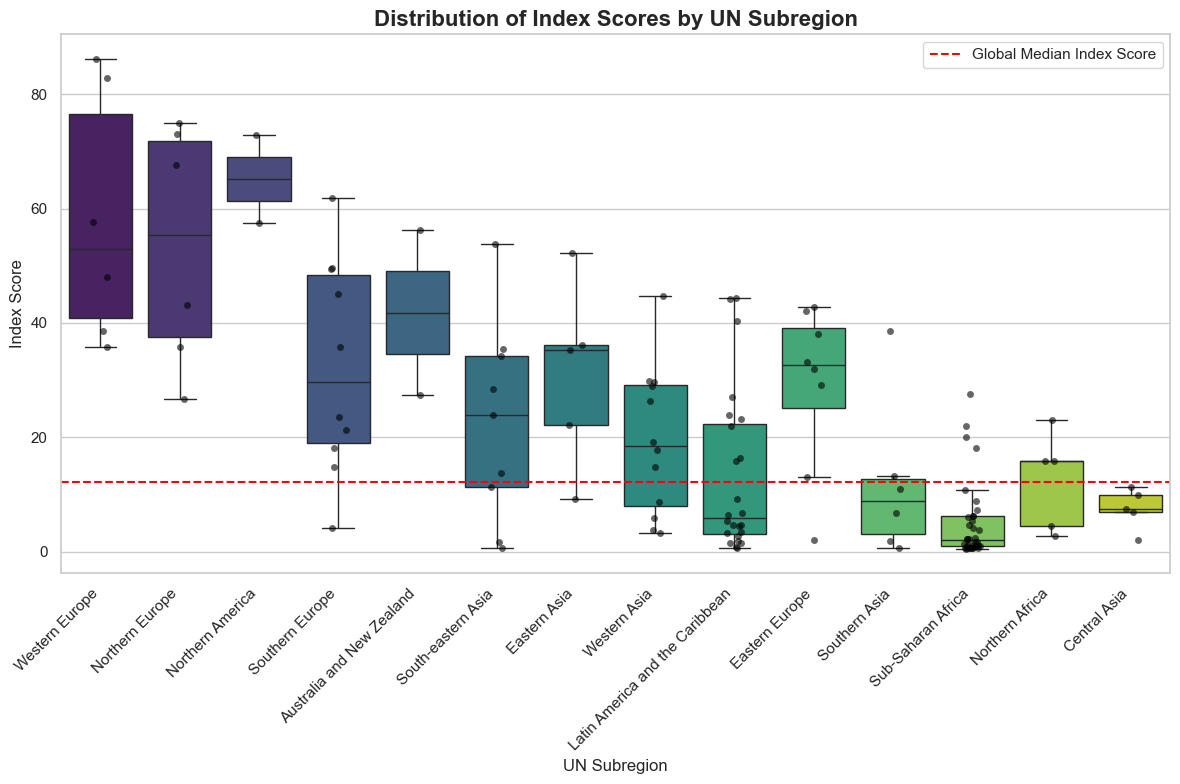

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style for the plot
sns.set_theme(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='UN_subregion', y='Index', palette="viridis", showfliers=False)
sns.stripplot(data=df, x='UN_subregion', y='Index', color='black', alpha=0.6, jitter=True, size=5)

# Add titles and labels
plt.title("Distribution of Index Scores by UN Subregion", fontsize=16, fontweight='bold')
plt.xlabel("UN Subregion", fontsize=12)
plt.ylabel("Index Score", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Highlight median lines with a bold style
plt.axhline(y=df['Index'].median(), color='red', linestyle='--', label="Global Median Index Score")

# Add legend for global median
plt.legend()

# Tight layout for neat spacing
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
df[df["UN_subregion"] == "Northern America"]

,Ranking,ISO3,Country,GIRAI_region,UN_region,UN_subregion,Index,P_GF,P_GA,P_NSA,D_HR,D_AIG,D_AIC,C_GF,C_GA,C_NSA
4,5.0,USA,United States of America,North America,Americas,Northern America,72.81,62.406384,79.186321,80.867360,65.372649,74.752738,84.339115,0.923939,0.885024,0.921875
8,9.0,CAN,Canada,North America,Americas,Northern America,57.39,37.797915,80.839746,49.684416,55.368540,59.074812,57.064637,0.957547,0.954009,0.976562


In [4]:
# import plotly.express as px

# # Create the interactive box plot with individual data points
# fig = px.box(
#     df,
#     x="UN_subregion",
#     y="Index",
#     points="all",  # Shows individual data points
#     hover_data=["Country", "ISO3", "Index"],  # Add relevant information to tooltips
#     color="UN_subregion",  # Different colors for each subregion
#     title="Interactive Box-and-Whisker Plot of Index Scores by UN Subregion",
# )

# # Update layout for better readability
# fig.update_layout(
#     xaxis_title="UN Subregion",
#     yaxis_title="Index Score",
#     xaxis_tickangle=45,
#     showlegend=False,
#     plot_bgcolor="white",
#     boxmode="group",
# )

# # Add gridlines for better readability
# fig.update_yaxes(showgrid=True, gridcolor="lightgray")
# fig.update_xaxes(showgrid=False)

# # Show the plot
# fig.show()
